# RESTAURANT COST PREDICTION

In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter('ignore')

In [2]:
# Reading the train dataset.
df_train = pd.read_excel('Data_Train.xlsx')
df_train

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300
...,...,...,...,...,...,...,...,...,...
12685,QUICK BITES,13228,"North Indian, Burger, Kebab","12noon – 12midnight (Mon, Tue, Wed, Thu, Sun)...",Hyderabad,Gachibowli,3.8,546 votes,500
12686,"CASUAL DINING,BAR",9686,"Goan, Continental","12noon – 1am (Mon-Fri),11am – 5pm, 7pm – 1am...",Mumbai,Bandra Kurla Complex,4.3,1214 votes,1800
12687,LOUNGE,11133,"Finger Food, Continental, Asian, Chinese",12noon – 12:30AM (Mon-Sun),Navi Mumbai,Vashi,4.0,608 votes,1300
12688,CASUAL DINING,6134,"North Indian, South Indian, Chinese, Street Food",6am – 10:45pm (Mon-Sun),Chennai,Maduravoyal,3.5,32 votes,400


In [3]:
# Reading the test dataset.
df_test = pd.read_excel('Data_Test.xlsx')
df_test

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,CASUAL DINING,4085,"North Indian, Chinese, Mughlai, Kebab",12noon – 12midnight (Mon-Sun),Noida,Sector 18,4.3,564 votes
1,QUICK BITES,12680,"South Indian, Fast Food, Pizza, North Indian",7am – 12:30AM (Mon-Sun),Mumbai,Grant Road,4.2,61 votes
2,CASUAL DINING,1411,"North Indian, Seafood, Biryani, Chinese",11am – 11:30pm (Mon-Sun),Mumbai,Marine Lines,3.8,350 votes
3,None,204,Biryani,"9am – 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...",Faridabad,NIT,3.8,1445 votes
4,QUICK BITES,13453,"South Indian, Kerala",11am – 10pm (Mon-Sun),Kochi,Kaloor,3.6,23 votes
...,...,...,...,...,...,...,...,...
4226,CASUAL DINING,9057,"North Indian, Mughlai, Chinese",11:30am – 11:30pm (Mon-Sun),New Delhi,Punjabi Bagh,3.9,287 votes
4227,None,1247,"Biryani, North Indian, Sandwich, Salad, Wraps",11am – 1am (Mon-Sun),Bangalore,HSR Layout,4.3,469 votes
4228,QUICK BITES,8617,"Continental, North Indian",9:30am – 10:30pm (Mon-Sun),Faridabad,Sector 86,3.7,53 votes
4229,QUICK BITES,6485,"Rolls, Beverages","11am – 11:30pm (Mon, Tue, Wed, Thu, Sat, Sun),...",Kochi,Kochi,-,NaN


In [4]:
# Concatenating the both train and test datasets.
df = pd.concat([df_train,df_test])

In [5]:
# Checking DataFrame after concatenating.
df

,CITY,COST,CUISINES,LOCALITY,RATING,RESTAURANT_ID,TIME,TITLE,VOTES
0,Thane,1200.0,"Malwani, Goan, North Indian",Dombivali East,3.6,9438,"11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",CASUAL DINING,49 votes
1,Chennai,1500.0,"Asian, Modern Indian, Japanese",Ramapuram,4.2,13198,6pm – 11pm (Mon-Sun),"CASUAL DINING,BAR",30 votes
2,Chennai,800.0,"North Indian, Chinese, Biryani, Hyderabadi",Saligramam,3.8,10915,"11am – 3:30pm, 7pm – 11pm (Mon-Sun)",CASUAL DINING,221 votes
3,Mumbai,800.0,"Tibetan, Chinese",Bandra West,4.1,6346,11:30am – 1am (Mon-Sun),QUICK BITES,24 votes
4,Mumbai,300.0,Desserts,Lower Parel,3.8,15387,11am – 1am (Mon-Sun),DESSERT PARLOR,165 votes
...,...,...,...,...,...,...,...,...,...
4226,New Delhi,NaN,"North Indian, Mughlai, Chinese",Punjabi Bagh,3.9,9057,11:30am – 11:30pm (Mon-Sun),CASUAL DINING,287 votes
4227,Bangalore,NaN,"Biryani, North Indian, Sandwich, Salad, Wraps",HSR Layout,4.3,1247,11am – 1am (Mon-Sun),None,469 votes
4228,Faridabad,NaN,"Continental, North Indian",Sector 86,3.7,8617,9:30am – 10:30pm (Mon-Sun),QUICK BITES,53 votes
4229,Kochi,NaN,"Rolls, Beverages",Kochi,-,6485,"11am – 11:30pm (Mon, Tue, Wed, Thu, Sat, Sun),...",QUICK BITES,NaN


In [6]:
# Checking columns of the dataset.
df.columns

Index(['CITY', 'COST', 'CUISINES', 'LOCALITY', 'RATING', 'RESTAURANT_ID',
       'TIME', 'TITLE', 'VOTES'],
      dtype='object')

In [7]:
# Information of the dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16921 entries, 0 to 4230
Data columns (total 9 columns):
CITY             16774 non-null object
COST             12690 non-null float64
CUISINES         16921 non-null object
LOCALITY         16793 non-null object
RATING           16917 non-null object
RESTAURANT_ID    16921 non-null int64
TIME             16921 non-null object
TITLE            16921 non-null object
VOTES            15315 non-null object
dtypes: float64(1), int64(1), object(7)
memory usage: 1.3+ MB


In [8]:
# Describing the dataset through Statistics.
df.describe()

,COST,RESTAURANT_ID
count,12690.000000,16921.000000
mean,655.252246,7767.211631
std,627.003540,4493.287626
min,20.000000,0.000000
25%,300.000000,3873.000000
50%,500.000000,7751.000000
75%,800.000000,11672.000000
max,14000.000000,15573.000000


Observation :
    --> Minimum cost for a person at a restaurant is 20INR and Maximum cost for a person is 14000INR.
    
   --> Mean cost is 655INR and Median cost is 500INR.

In [9]:
# Checking datatypes. 
df.dtypes

CITY              object
COST             float64
CUISINES          object
LOCALITY          object
RATING            object
RESTAURANT_ID      int64
TIME              object
TITLE             object
VOTES             object
dtype: object

In [10]:
# Finding Null values.
df.isnull().sum()

CITY              147
COST             4231
CUISINES            0
LOCALITY          128
RATING              4
RESTAURANT_ID       0
TIME                0
TITLE               0
VOTES            1606
dtype: int64

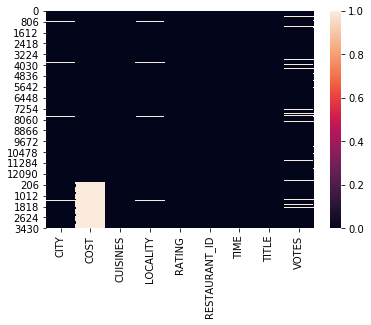

In [11]:
# Visualizing the null values through heatmap.
sns.heatmap(df.isnull())

In [12]:
# Filling the null values with '0'.
for col in ['CITY','COST','LOCALITY','VOTES','RATING']:
    df[col].fillna(df[col].mode()[0],inplace=True)

In [13]:
# Checking the null values present or not.
df.isnull().sum()
# Hence No null values.

CITY             0
COST             0
CUISINES         0
LOCALITY         0
RATING           0
RESTAURANT_ID    0
TIME             0
TITLE            0
VOTES            0
dtype: int64

In [14]:
# Information of the dataset. 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16921 entries, 0 to 4230
Data columns (total 9 columns):
CITY             16921 non-null object
COST             16921 non-null float64
CUISINES         16921 non-null object
LOCALITY         16921 non-null object
RATING           16921 non-null object
RESTAURANT_ID    16921 non-null int64
TIME             16921 non-null object
TITLE            16921 non-null object
VOTES            16921 non-null object
dtypes: float64(1), int64(1), object(7)
memory usage: 1.3+ MB


In [15]:
# Finding the duplicate values.
df.duplicated().sum()

26

In [16]:
# And, Dropping the 26 duplicate values.
df = df.drop_duplicates()

In [17]:
df

,CITY,COST,CUISINES,LOCALITY,RATING,RESTAURANT_ID,TIME,TITLE,VOTES
0,Thane,1200.0,"Malwani, Goan, North Indian",Dombivali East,3.6,9438,"11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",CASUAL DINING,49 votes
1,Chennai,1500.0,"Asian, Modern Indian, Japanese",Ramapuram,4.2,13198,6pm – 11pm (Mon-Sun),"CASUAL DINING,BAR",30 votes
2,Chennai,800.0,"North Indian, Chinese, Biryani, Hyderabadi",Saligramam,3.8,10915,"11am – 3:30pm, 7pm – 11pm (Mon-Sun)",CASUAL DINING,221 votes
3,Mumbai,800.0,"Tibetan, Chinese",Bandra West,4.1,6346,11:30am – 1am (Mon-Sun),QUICK BITES,24 votes
4,Mumbai,300.0,Desserts,Lower Parel,3.8,15387,11am – 1am (Mon-Sun),DESSERT PARLOR,165 votes
...,...,...,...,...,...,...,...,...,...
4226,New Delhi,300.0,"North Indian, Mughlai, Chinese",Punjabi Bagh,3.9,9057,11:30am – 11:30pm (Mon-Sun),CASUAL DINING,287 votes
4227,Bangalore,300.0,"Biryani, North Indian, Sandwich, Salad, Wraps",HSR Layout,4.3,1247,11am – 1am (Mon-Sun),None,469 votes
4228,Faridabad,300.0,"Continental, North Indian",Sector 86,3.7,8617,9:30am – 10:30pm (Mon-Sun),QUICK BITES,53 votes
4229,Kochi,300.0,"Rolls, Beverages",Kochi,-,6485,"11am – 11:30pm (Mon, Tue, Wed, Thu, Sat, Sun),...",QUICK BITES,44 votes


In [18]:
# Finding Correlation.
df.corr()

,COST,RESTAURANT_ID
COST,1.000000,0.033476
RESTAURANT_ID,0.033476,1.000000


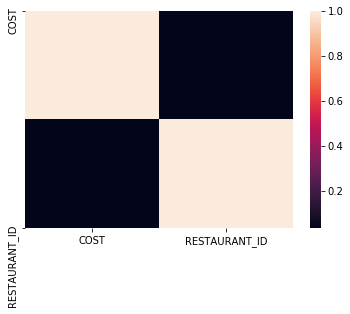

In [19]:
# Visualizing Correlation through heatmap.
sns.heatmap(df.corr())

In [20]:
# Adding 'CITY' column to 'LOCALITY' column to get easy to preprocessing and dropping 'CITY' and 'LOCALITY'.
df['Location'] = df['CITY'] + df['LOCALITY']
df.drop(columns=['CITY','LOCALITY'])

,COST,CUISINES,RATING,RESTAURANT_ID,TIME,TITLE,VOTES,Location
0,1200.0,"Malwani, Goan, North Indian",3.6,9438,"11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",CASUAL DINING,49 votes,ThaneDombivali East
1,1500.0,"Asian, Modern Indian, Japanese",4.2,13198,6pm – 11pm (Mon-Sun),"CASUAL DINING,BAR",30 votes,ChennaiRamapuram
2,800.0,"North Indian, Chinese, Biryani, Hyderabadi",3.8,10915,"11am – 3:30pm, 7pm – 11pm (Mon-Sun)",CASUAL DINING,221 votes,ChennaiSaligramam
3,800.0,"Tibetan, Chinese",4.1,6346,11:30am – 1am (Mon-Sun),QUICK BITES,24 votes,MumbaiBandra West
4,300.0,Desserts,3.8,15387,11am – 1am (Mon-Sun),DESSERT PARLOR,165 votes,MumbaiLower Parel
...,...,...,...,...,...,...,...,...
4226,300.0,"North Indian, Mughlai, Chinese",3.9,9057,11:30am – 11:30pm (Mon-Sun),CASUAL DINING,287 votes,New DelhiPunjabi Bagh
4227,300.0,"Biryani, North Indian, Sandwich, Salad, Wraps",4.3,1247,11am – 1am (Mon-Sun),None,469 votes,BangaloreHSR Layout
4228,300.0,"Continental, North Indian",3.7,8617,9:30am – 10:30pm (Mon-Sun),QUICK BITES,53 votes,FaridabadSector 86
4229,300.0,"Rolls, Beverages",-,6485,"11am – 11:30pm (Mon, Tue, Wed, Thu, Sat, Sun),...",QUICK BITES,44 votes,KochiKochi


In [21]:
# Converting 'VOTES' column into float . 
df['VOTES'] = df['VOTES'].str.extract('(\d+)').astype(float)

In [22]:
# Checking votes column.
df.head()

,CITY,COST,CUISINES,LOCALITY,RATING,RESTAURANT_ID,TIME,TITLE,VOTES,Location
0,Thane,1200.0,"Malwani, Goan, North Indian",Dombivali East,3.6,9438,"11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",CASUAL DINING,49.0,ThaneDombivali East
1,Chennai,1500.0,"Asian, Modern Indian, Japanese",Ramapuram,4.2,13198,6pm – 11pm (Mon-Sun),"CASUAL DINING,BAR",30.0,ChennaiRamapuram
2,Chennai,800.0,"North Indian, Chinese, Biryani, Hyderabadi",Saligramam,3.8,10915,"11am – 3:30pm, 7pm – 11pm (Mon-Sun)",CASUAL DINING,221.0,ChennaiSaligramam
3,Mumbai,800.0,"Tibetan, Chinese",Bandra West,4.1,6346,11:30am – 1am (Mon-Sun),QUICK BITES,24.0,MumbaiBandra West
4,Mumbai,300.0,Desserts,Lower Parel,3.8,15387,11am – 1am (Mon-Sun),DESSERT PARLOR,165.0,MumbaiLower Parel


In [23]:
# Splitting ',' from cuisines column.
cuisines_list=[]
for row in df['CUISINES']:
    cuisines_list.append(list(row.split(',')))

df['CUISINES']=cuisines_list

In [24]:
# Defining cuisines again with lambda function.
df_cuisines=df['CUISINES'].apply(lambda x: pd.Series(1, x))

In [25]:
df.head()

,CITY,COST,CUISINES,LOCALITY,RATING,RESTAURANT_ID,TIME,TITLE,VOTES,Location
0,Thane,1200.0,"[Malwani, Goan, North Indian]",Dombivali East,3.6,9438,"11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",CASUAL DINING,49.0,ThaneDombivali East
1,Chennai,1500.0,"[Asian, Modern Indian, Japanese]",Ramapuram,4.2,13198,6pm – 11pm (Mon-Sun),"CASUAL DINING,BAR",30.0,ChennaiRamapuram
2,Chennai,800.0,"[North Indian, Chinese, Biryani, Hyderabadi]",Saligramam,3.8,10915,"11am – 3:30pm, 7pm – 11pm (Mon-Sun)",CASUAL DINING,221.0,ChennaiSaligramam
3,Mumbai,800.0,"[Tibetan, Chinese]",Bandra West,4.1,6346,11:30am – 1am (Mon-Sun),QUICK BITES,24.0,MumbaiBandra West
4,Mumbai,300.0,[Desserts],Lower Parel,3.8,15387,11am – 1am (Mon-Sun),DESSERT PARLOR,165.0,MumbaiLower Parel


In [26]:
# Converting 'RATING' column into float .
df['RATING']=df['RATING'].str.extract('(\d+)').astype(float)

In [27]:
# Checking Head of the data for Rating.
df.head()

,CITY,COST,CUISINES,LOCALITY,RATING,RESTAURANT_ID,TIME,TITLE,VOTES,Location
0,Thane,1200.0,"[Malwani, Goan, North Indian]",Dombivali East,3.0,9438,"11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",CASUAL DINING,49.0,ThaneDombivali East
1,Chennai,1500.0,"[Asian, Modern Indian, Japanese]",Ramapuram,4.0,13198,6pm – 11pm (Mon-Sun),"CASUAL DINING,BAR",30.0,ChennaiRamapuram
2,Chennai,800.0,"[North Indian, Chinese, Biryani, Hyderabadi]",Saligramam,3.0,10915,"11am – 3:30pm, 7pm – 11pm (Mon-Sun)",CASUAL DINING,221.0,ChennaiSaligramam
3,Mumbai,800.0,"[Tibetan, Chinese]",Bandra West,4.0,6346,11:30am – 1am (Mon-Sun),QUICK BITES,24.0,MumbaiBandra West
4,Mumbai,300.0,[Desserts],Lower Parel,3.0,15387,11am – 1am (Mon-Sun),DESSERT PARLOR,165.0,MumbaiLower Parel


Text(0, 0.5, 'Count')

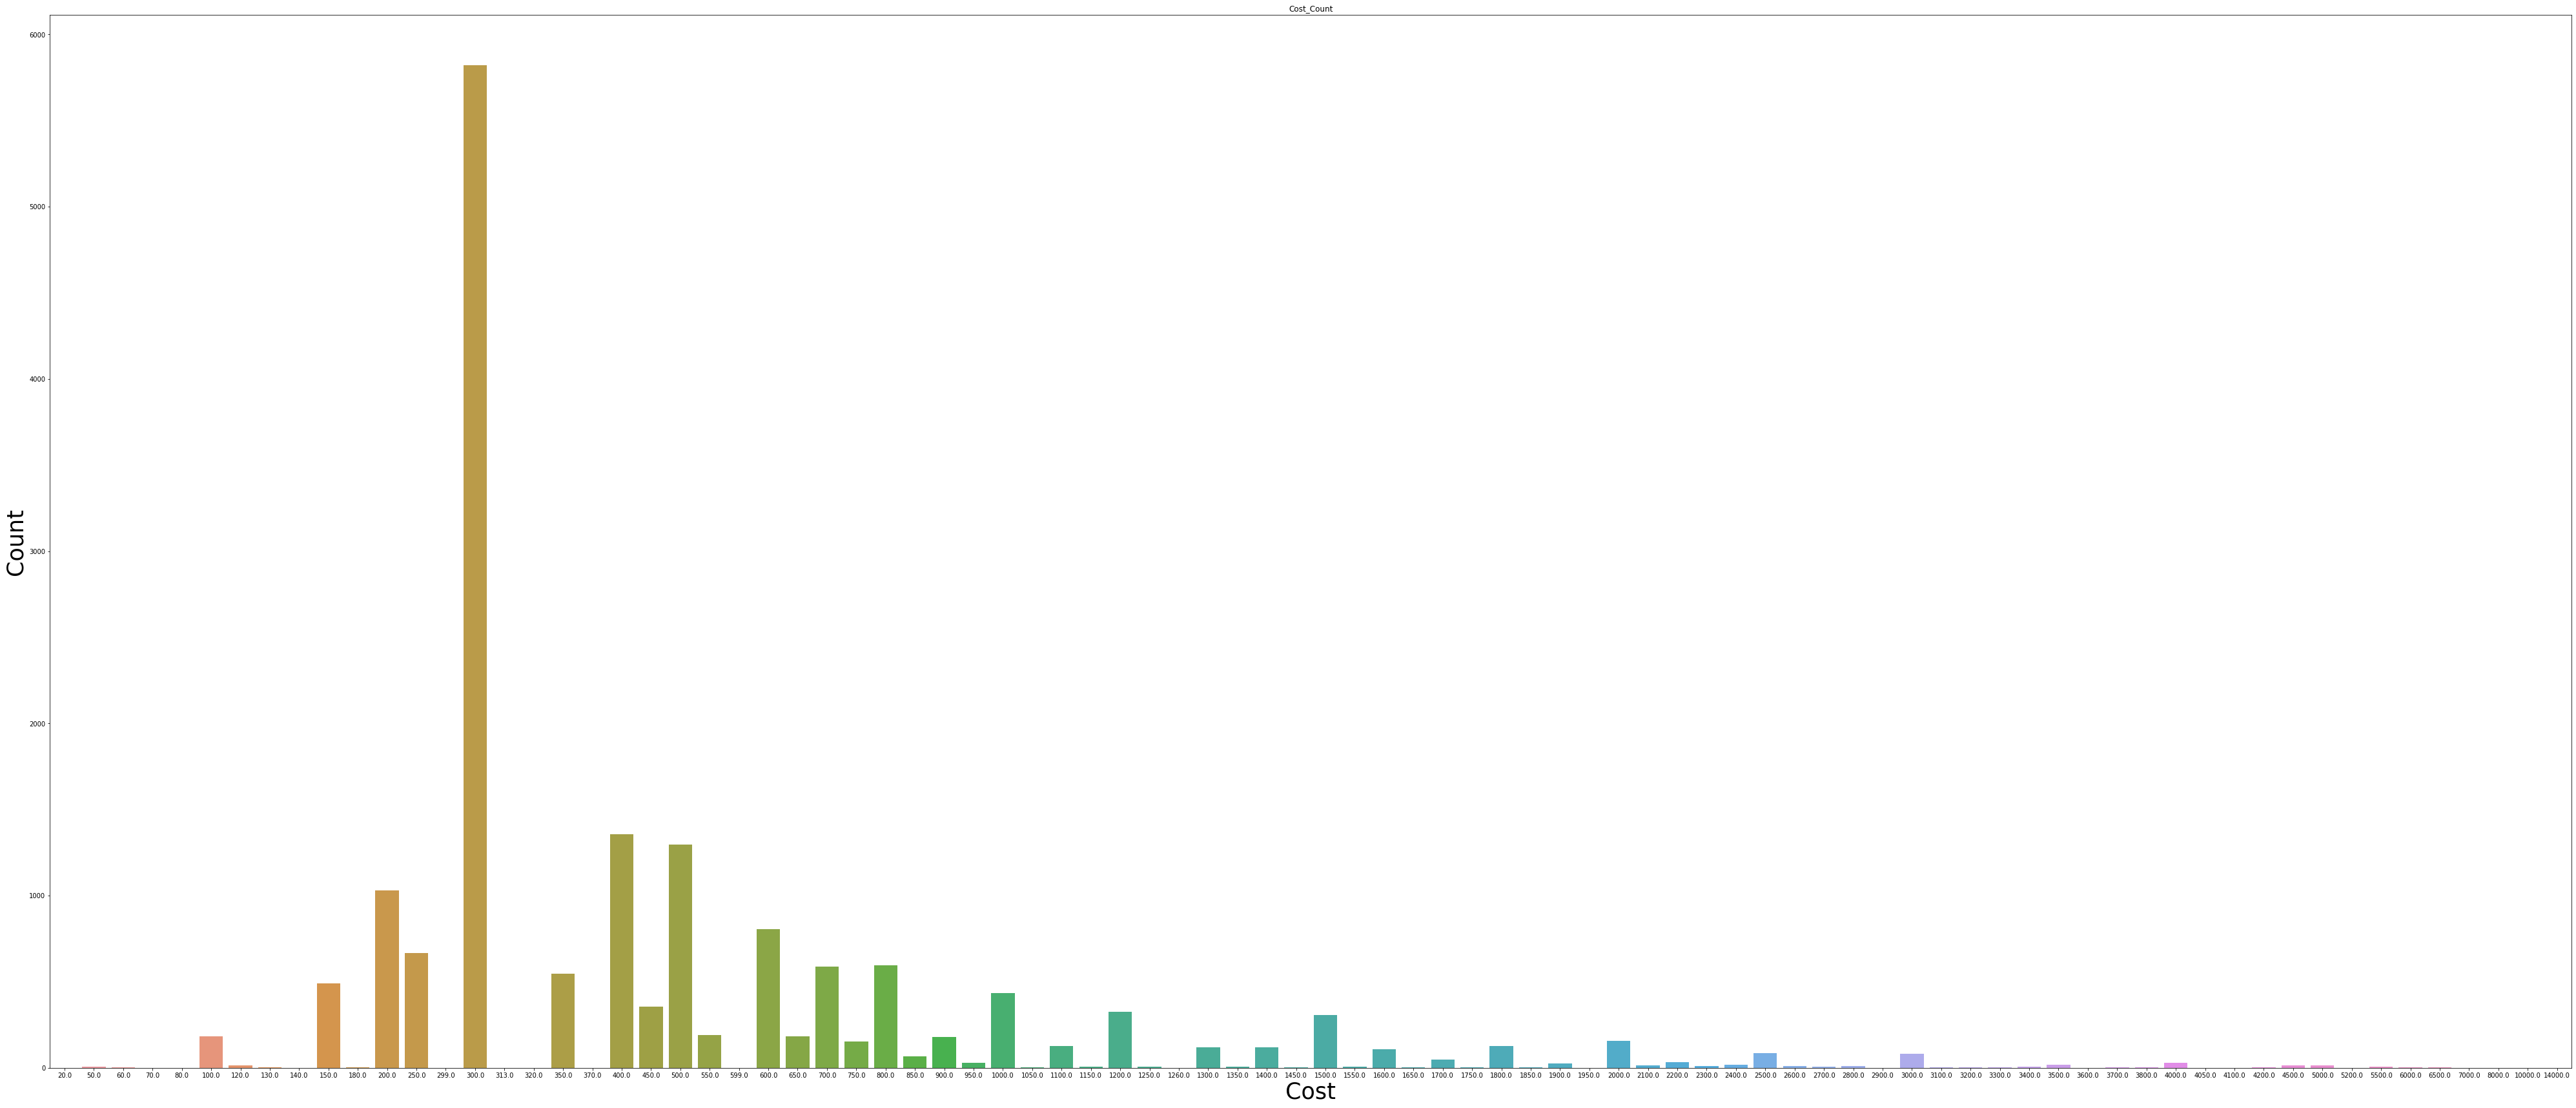

In [28]:
# Visualizing Count plot for COST.
plt.figure(figsize=(70,30))
sns.countplot(df['COST'])
plt.title('Cost_Count')
plt.xlabel('Cost',fontsize=35)
plt.ylabel('Count',fontsize=35)

Text(0, 0.5, 'Count')

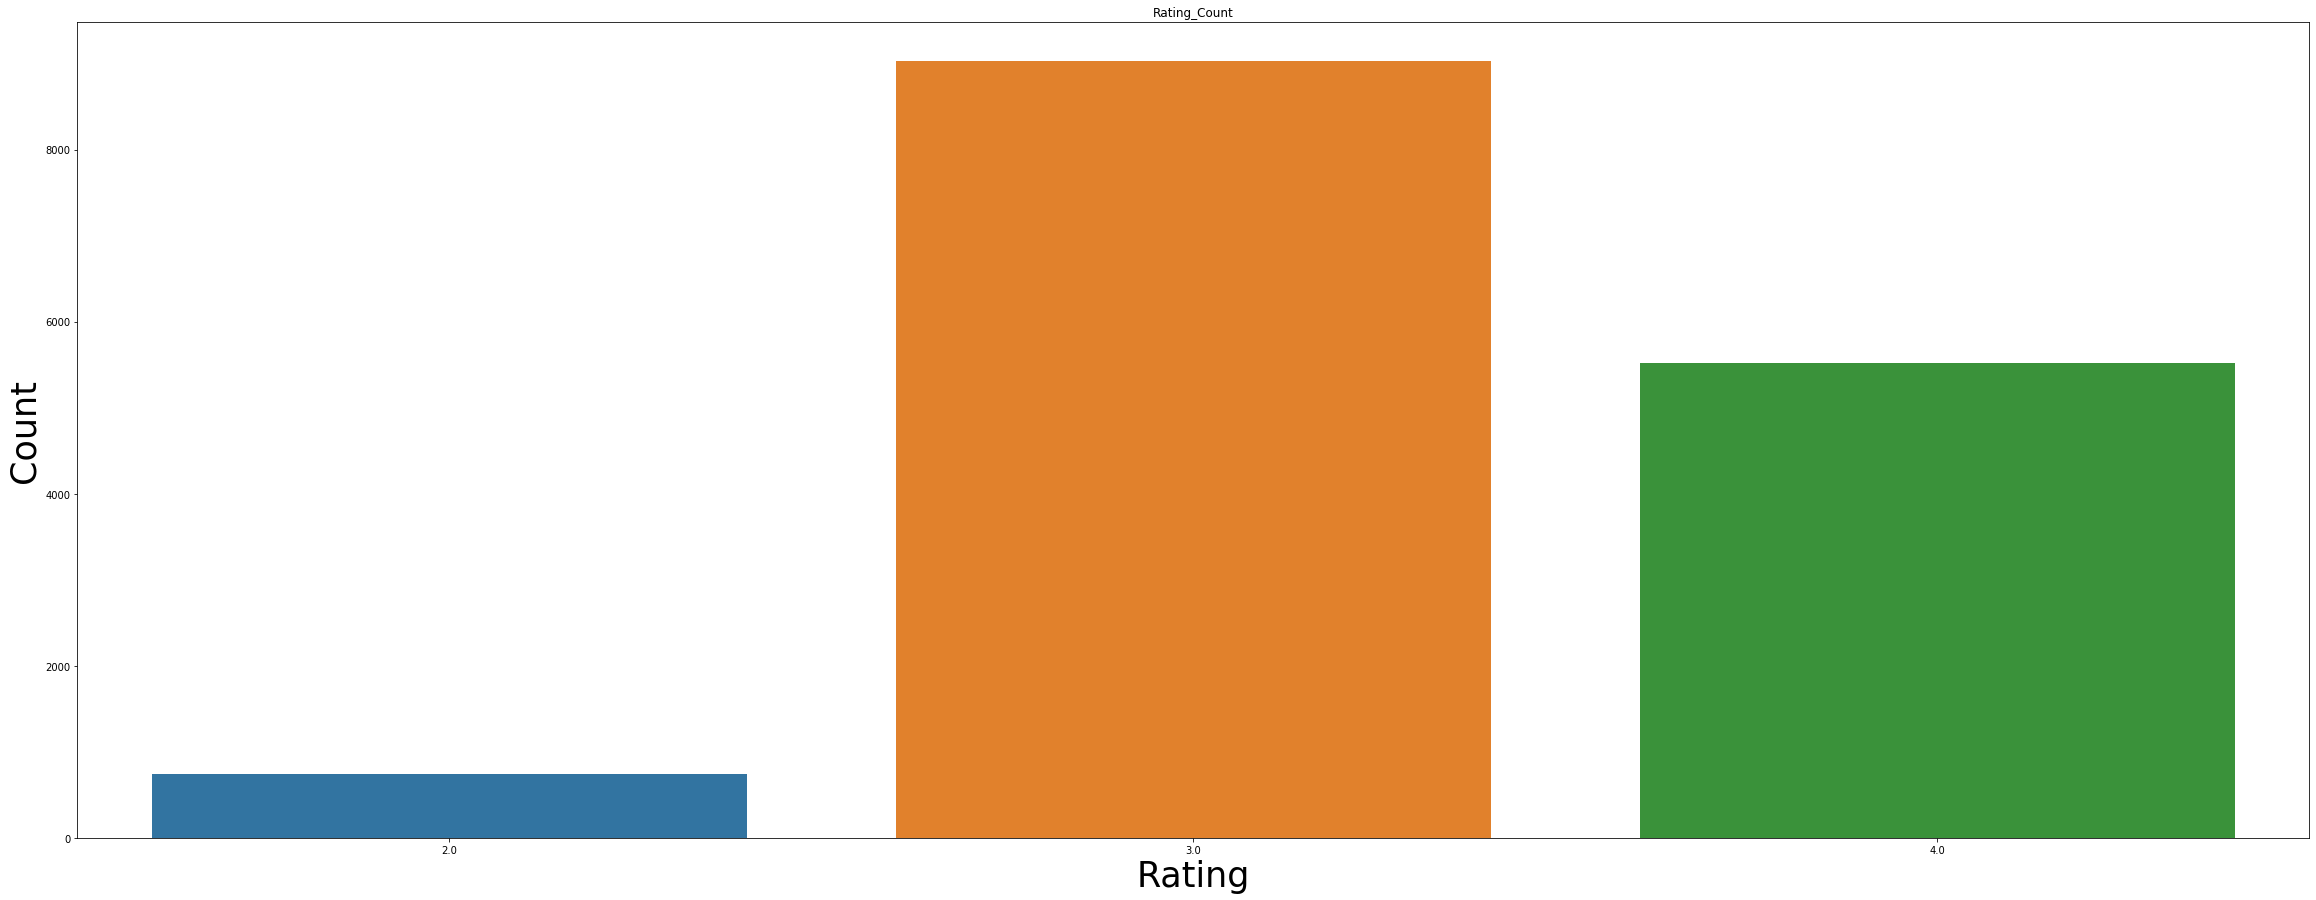

In [29]:
# Visualizing Count plot for 'RATING'.
plt.figure(figsize=(40,15))
sns.countplot(df['RATING'])
plt.title('Rating_Count')
plt.xlabel('Rating',fontsize=35)
plt.ylabel('Count',fontsize=35)

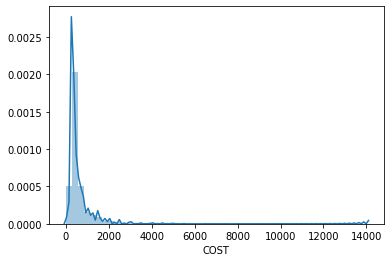

In [30]:
# Visualizing Distribution plot for 'COST'.
sns.distplot(df['COST'])

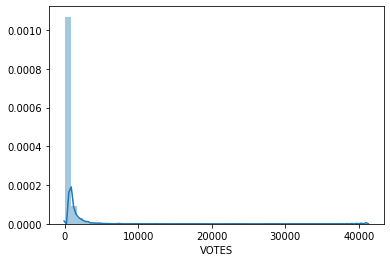

In [31]:
# Visualizing Distribution plot for 'VOTES'.
sns.distplot(df['VOTES'])

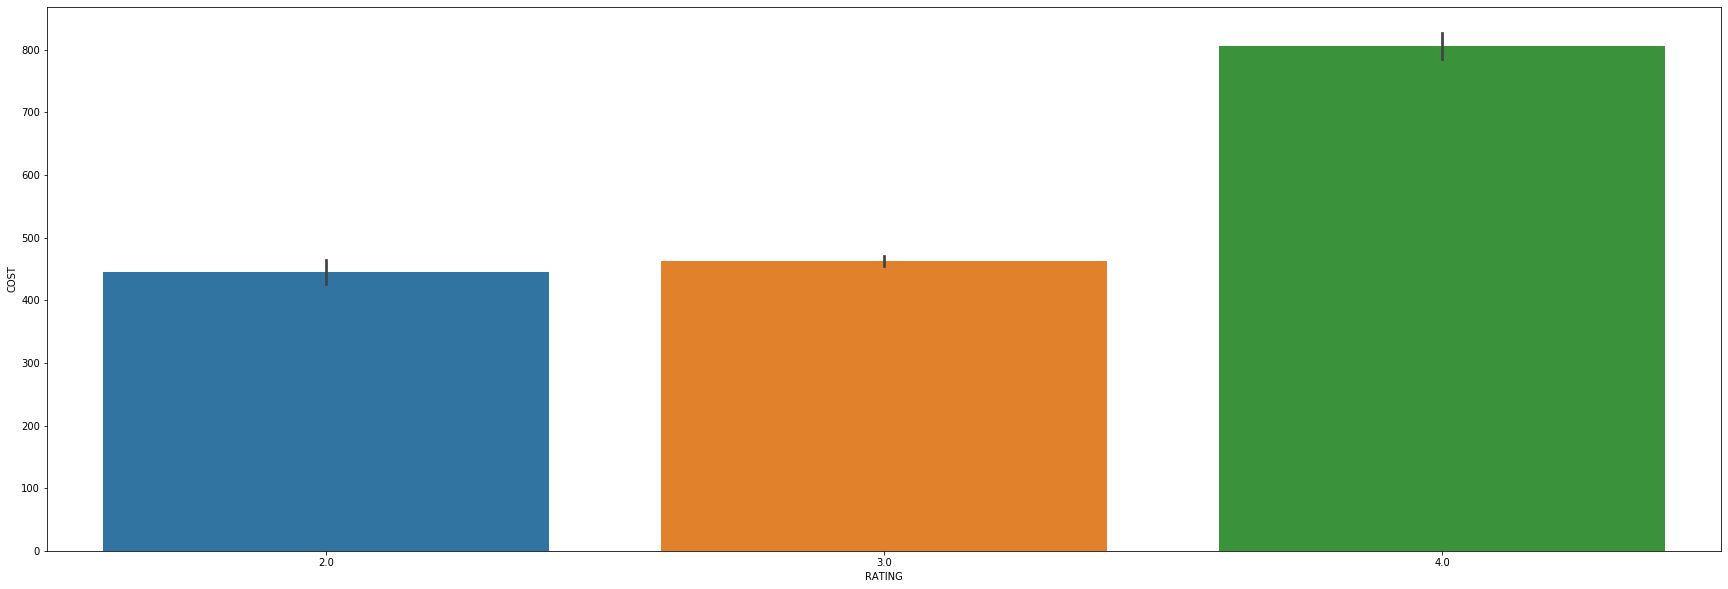

In [32]:
# Visualizing Bar plot for 'RATING' vs 'COST'.
plt.figure(figsize=(30,10))
sns.barplot(x='RATING',y='COST',data=df)

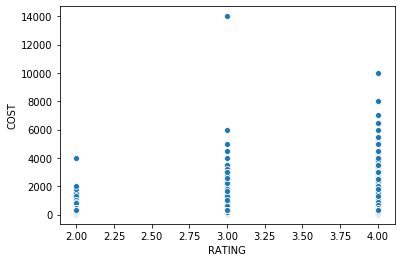

In [33]:
# Visualizing scatter plot for 'RATING' vs 'COST'.
sns.scatterplot(df['RATING'],df['COST'])

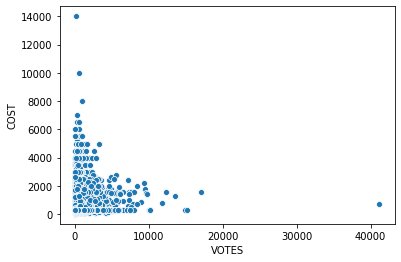

In [34]:
# Visualizing scatter plot for 'VOTES' vs 'COST'.
sns.scatterplot(df['VOTES'],df['COST'])

COST                AxesSubplot(0.125,0.71587;0.133621x0.16413)
RATING           AxesSubplot(0.285345,0.71587;0.133621x0.16413)
RESTAURANT_ID     AxesSubplot(0.44569,0.71587;0.133621x0.16413)
VOTES            AxesSubplot(0.606034,0.71587;0.133621x0.16413)
dtype: object

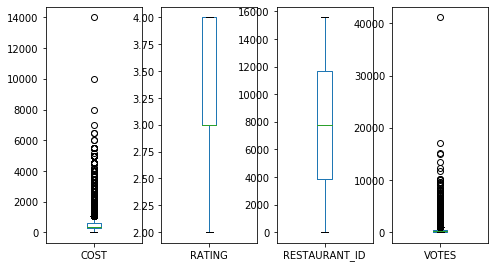

In [35]:
# Finding Null values for required columns to analysis.
df.plot(kind='box',subplots = True, layout=(4,5),figsize = (10,20))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D6E8AA7648>,
      dtype=object)

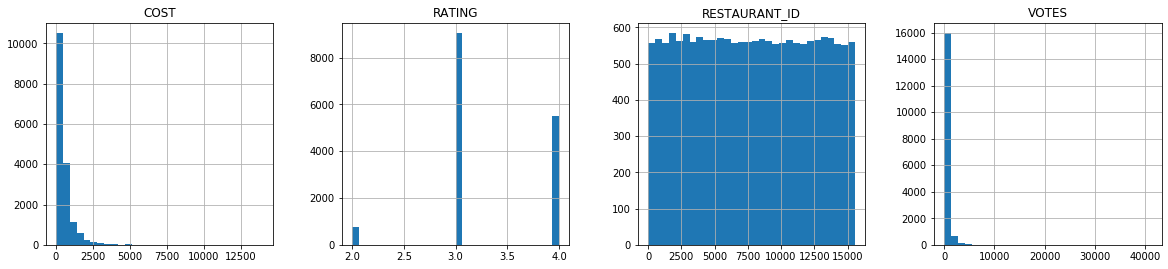

In [36]:
# Visualizing Histogram for required columns to analysis.
df.hist(figsize=(20,20),grid=True,layout = (4,4),bins=30)

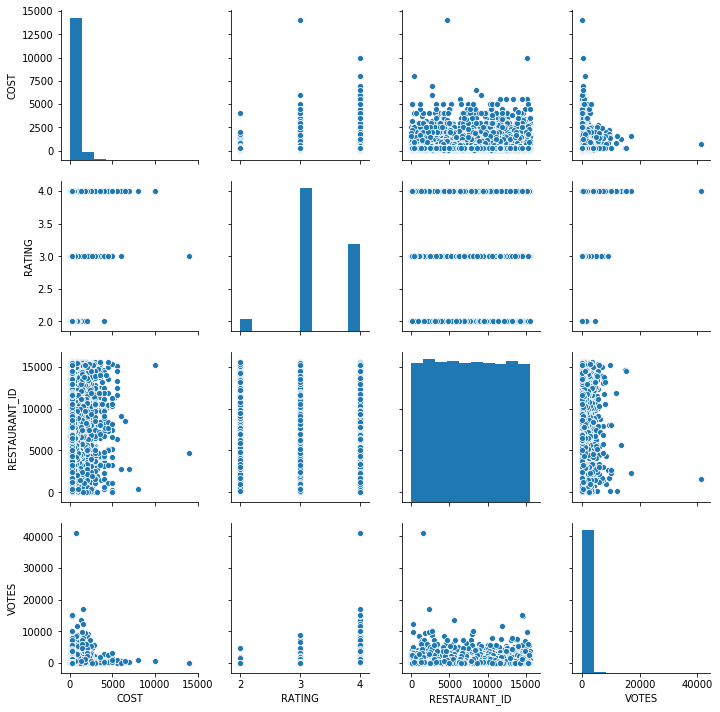

In [37]:
# Visualizing pairplot for required columns to analysis.
sns.pairplot(df)

In [38]:
# Getting the subsets of the 'TITLE' column through lambda function of series.
title_list=[]
for row in df['TITLE']:
    title_list.append(list(row.split(',')))
df['TITLE']=title_list
df_title=df['TITLE'].apply(lambda x: pd.Series(1, x))
df_title.head()

,CASUAL DINING,BAR,QUICK BITES,DESSERT PARLOR,CAFÉ,MICROBREWERY,BEVERAGE SHOP,IRANI CAFE,BAKERY,None,...,FOOD TRUCK,MESS,KIOSK,CLUB,CONFECTIONERY,DHABA,MEAT SHOP,COCKTAIL BAR,PAAN SHOP,BHOJANALYA
0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
# Getting dummies from 'Location' as cities.
df_City=pd.get_dummies(df['Location'])
df.drop(columns='Location',inplace=True)
df_City.head()

,10th avenueSaane Apartment,1st StageMaruthi Nagar Main Road,1st Tavarekere3rd Cross Cashire Layout,3rd StreetOld Door AA24 AA Block,5th Main Teachers Colony Koramangala Block 1 Bangalore 560034The Mylapore Cafe 29,6 & 7 - 4/64 Subhash Nagar5,682024Kochi,682035.Kerala,682036Kerala,APR ChambersHouse 3-5-909/B/1,...,kochiKacheripady,kochiKathrikadavu,kochiThaikkavu Aluva 6,kochikakkanad,navi mumbaiseawoods grand central mall,opp gurudwara ShakurpurNear Jeevan Jyoti Apartment,opp mukteshwar ashram powaiShop no 3,opposite to western side of ITPL Service gateWhitefield,p.o KochiEdappally,ward X11MPL 6303
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
# Concatenating Dummy values to the DataFrame.
df = pd.concat([df,df_City,df_cuisines,df_title], axis=1)

In [41]:
df.head()

,CITY,COST,CUISINES,LOCALITY,RATING,RESTAURANT_ID,TIME,TITLE,VOTES,10th avenueSaane Apartment,...,FOOD TRUCK,MESS,KIOSK,CLUB,CONFECTIONERY,DHABA,MEAT SHOP,COCKTAIL BAR,PAAN SHOP,BHOJANALYA
0,Thane,1200.0,"[Malwani, Goan, North Indian]",Dombivali East,3.0,9438,"11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",[CASUAL DINING],49.0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Chennai,1500.0,"[Asian, Modern Indian, Japanese]",Ramapuram,4.0,13198,6pm – 11pm (Mon-Sun),"[CASUAL DINING, BAR]",30.0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Chennai,800.0,"[North Indian, Chinese, Biryani, Hyderabadi]",Saligramam,3.0,10915,"11am – 3:30pm, 7pm – 11pm (Mon-Sun)",[CASUAL DINING],221.0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Mumbai,800.0,"[Tibetan, Chinese]",Bandra West,4.0,6346,11:30am – 1am (Mon-Sun),[QUICK BITES],24.0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Mumbai,300.0,[Desserts],Lower Parel,3.0,15387,11am – 1am (Mon-Sun),[DESSERT PARLOR],165.0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
# Dropping the un-useful columns.
df_new = df.drop(['TITLE','TIME','CITY','LOCALITY','CUISINES'], axis=1)

In [43]:
# After dropping the columns.
df_new

,COST,RATING,RESTAURANT_ID,VOTES,10th avenueSaane Apartment,1st StageMaruthi Nagar Main Road,1st Tavarekere3rd Cross Cashire Layout,3rd StreetOld Door AA24 AA Block,5th Main Teachers Colony Koramangala Block 1 Bangalore 560034The Mylapore Cafe 29,6 & 7 - 4/64 Subhash Nagar5,...,FOOD TRUCK,MESS,KIOSK,CLUB,CONFECTIONERY,DHABA,MEAT SHOP,COCKTAIL BAR,PAAN SHOP,BHOJANALYA
0,1200.0,3.0,9438,49.0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1500.0,4.0,13198,30.0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,800.0,3.0,10915,221.0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,800.0,4.0,6346,24.0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,300.0,3.0,15387,165.0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4226,300.0,3.0,9057,287.0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4227,300.0,4.0,1247,469.0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4228,300.0,3.0,8617,53.0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4229,300.0,NaN,6485,44.0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
# Now,Finally filling the null values with 0.
df = df_new.fillna(0)

In [45]:
# Defining 'X' variable.
X = df.drop('COST',axis=1)
X

,RATING,RESTAURANT_ID,VOTES,10th avenueSaane Apartment,1st StageMaruthi Nagar Main Road,1st Tavarekere3rd Cross Cashire Layout,3rd StreetOld Door AA24 AA Block,5th Main Teachers Colony Koramangala Block 1 Bangalore 560034The Mylapore Cafe 29,6 & 7 - 4/64 Subhash Nagar5,682024Kochi,...,FOOD TRUCK,MESS,KIOSK,CLUB,CONFECTIONERY,DHABA,MEAT SHOP,COCKTAIL BAR,PAAN SHOP,BHOJANALYA
0,3.0,9438,49.0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4.0,13198,30.0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,10915,221.0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.0,6346,24.0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3.0,15387,165.0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4226,3.0,9057,287.0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4227,4.0,1247,469.0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4228,3.0,8617,53.0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4229,0.0,6485,44.0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [46]:
# Defining 'y' variable.
y = df['COST']
y

0       1200.0
1       1500.0
2        800.0
3        800.0
4        300.0
         ...  
4226     300.0
4227     300.0
4228     300.0
4229     300.0
4230     300.0
Name: COST, Length: 16895, dtype: float64

In [47]:
# Splitting the data into training and testing model.
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=0)

In [48]:
# Using RandomForestRegressor algorithm to fit and predict the model.
from sklearn.ensemble import RandomForestRegressor
Rf = RandomForestRegressor()
Rf.fit(X_train,y_train)
y_pred = Rf.predict(X_test)
y_pred

array([265., 290., 275., ..., 565., 345., 515.])

In [49]:
# And, the score of the training model.
Rf.score(X_train,y_train)

0.8995692966070462

In [50]:
# And, finally Predicted score.
from sklearn.metrics import r2_score
print(r2_score(y_test,y_pred))

0.5080635659016437


In [51]:
# Importing Multiple Algorithms to train and test the model.
from sklearn.linear_model import Lasso,Ridge,ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import GridSearchCV,cross_val_score

In [52]:
# Finding r2_score.mean_absolute_error,mean_squared_error and Root_mean_squared_error.
model = [SVR(),DecisionTreeRegressor(),KNeighborsRegressor(),AdaBoostRegressor(),GradientBoostingRegressor(),Lasso(),Ridge(),ElasticNet()]

for m in model:
    m.fit(X_train,y_train)
    score = m.score(X_train,y_train)
    m_pred = m.predict(X_test)
    print('score of',m,'is:',score)
    print('MAE:',mean_absolute_error(y_test,m_pred))
    print('MSE:', mean_squared_error(y_test,m_pred))
    print('RMSE:', np.sqrt(mean_squared_error(y_test,m_pred)))
    print('R2_score:', r2_score(y_test,m_pred))
    print('******************************************************')
    print('\n')

score of SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False) is: -0.13936760025162065
MAE: 294.03018875997753
MSE: 335925.32217876066
RMSE: 579.5906505273879
R2_score: -0.16240949087460343
******************************************************


score of DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best') is: 0.9997879683174664
MAE: 267.60564213848886
MSE: 250344.32215427107
RMSE: 500.34420367809906
R2_score: 0.13372825194809634
******************************************************


score of KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
             

Observation : 
    --> GradientBoostingRegressor got a best fit score among all alogorithms of 54%.
    
    --> Lasso and Ridge both got a best score similarly of 52% and 51%.
    
    --> And, RandomForestRegressor got score of 50%.

In [55]:
# And, Saving the best model as a pickle in the file.
warnings.simplefilter('ignore')
from sklearn.externals import joblib

joblib.dump(GradientBoostingRegressor,'Restaurant_Cost_Prediction.pkl')

['Restaurant_Cost_Prediction.pkl']

Thank You...!!